In [1]:
path = r'C:/Users/ruw/Desktop'
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, rf'{path}\RA\penicilin\Libaries')



In [2]:
matching_database = "ev391cutoff"
database = "penicillin_cut_off"

In [3]:
import reload_lib as rl
import lca
import standards as s
import sensitivity as st




In [4]:
from lca import LCA

var = LCA(path=path, matching_database=matching_database)


In [5]:
data = var.LCA_initialization()

You selected to not reload
Initialization is completed for penicillin_cut_off_IN


In [6]:
data["Penicillin G, defined system"]

{'production of alchohol wipes' (unit, DK, None): 1,
 'packaging of glass vials with penicillin G' (unit, IN, None): 0.1,
 'production of a pair of gloves' (unit, MY, None): 1,
 'treatment of hazardous waste, hazardous waste incineration, with energy recovery' (kilogram, CH, None): -0.1525908333333333,
 'production of IV sets' (unit, RER, None): 1,
 'medical connector' (unit, GLO, None): 1,
 'market for sodium chlorate, powder' (kilogram, RER, None): 0.0009000000000000001,
 'stopcock' (unit, GLO, None): 1,
 'market for water, ultrapure' (kilogram, RER, None): 0.1,
 'waste packaging paper, Recycled Content cut-off' (kilogram, GLO, None): 0.020203974}

In [7]:
import bw2data as bd
import bw2calc as bc
import pandas as pd
from copy import deepcopy as dc
import sensitivity as st
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
bd.projects.current

'Penicillin'

In [207]:
var.system_path

'C:/Users/ruw/Desktop\\RA\\penicilin\\data\\database.xlsx'

In [208]:
with pd.ExcelFile(var.system_path) as excel_file:
        # Get the sheet names
        sheet_names = excel_file.sheet_names
    
sheets_to_import = []
for sheet in sheet_names:
    if matching_database in sheet:
        sheets_to_import.append(sheet)
    
sheets_to_import

['ev391cutoff',
 'ev391cutoff CN',
 'ev391cutoff IT',
 'ev391cutoff CH',
 'ev391cutoff US']

In [218]:
db_lst = []
reload = False
for sheet in sheets_to_import:
    data = pd.read_excel(var.system_path, sheet_name=sheet)
    db_lst.append(data.columns[1])
    if data.columns[1] not in bd.databases:
        print(f"{data.columns[1]} not in {bd.projects.current}")
        reload = True
        break
    else:
        print(f"{data.columns[1]} in {bd.projects.current}")



penicillin_cut_off_IN in Penicillin
penicillin_cut_off_CN in Penicillin
penicillin_cut_off_IT in Penicillin
penicillin_cut_off_CH in Penicillin
penicillin_cut_off_US in Penicillin


In [9]:
fu_all = data["Penicillin G, defined system"]
fu_sep = []
for key, item in fu_all.items():
    fu_sep.append({key : item})
fu_sep

[{'production of alchohol wipes' (unit, DK, None): 1},
 {'packaging of glass vials with penicillin G' (unit, IN, None): 0.1},
 {'production of a pair of gloves' (unit, MY, None): 1},
 {'treatment of hazardous waste, hazardous waste incineration, with energy recovery' (kilogram, CH, None): -0.1525908333333333},
 {'production of IV sets' (unit, RER, None): 1},
 {'medical connector' (unit, GLO, None): 1},
 {'market for sodium chlorate, powder' (kilogram, RER, None): 0.0009000000000000001},
 {'stopcock' (unit, GLO, None): 1},
 {'market for water, ultrapure' (kilogram, RER, None): 0.1},
 {'waste packaging paper, Recycled Content cut-off' (kilogram, GLO, None): 0.020203974}]

In [10]:
for act in var.db:
    # print(act)
    if "penicillium G" in str(act):
        print(act)
    #     fu_sep.append({act : -scaling_dct["manufacturing of raw penicillium G"]})
    #     idx_lst.append(act)

'manufacturing of raw penicillium G' (kilogram, IN, None)


In [204]:
fu_all = data["Penicillin G, defined system"]
fu_sep = []
idx_lst = []
acts = list(fu_all.keys())
val = fu_all[acts[1]]
scaling_dct = st.treatment_quantity(var.system_path, var.db)

for key, item in fu_all.items():
    if "glass vials" in str(key):

        fu_sep.append({key : item})
        idx_lst.append(key)
        for act in var.db:
            if "penicillium G" in str(act):
                # print(act)
                fu_sep.append({act : scaling_dct["manufacturing of raw penicillium G"]})
                idx_lst.append(act)
    else:
        fu_sep.append({key : item})
        idx_lst.append(key)
idx_lst


['production of alchohol wipes' (unit, DK, None),
 'packaging of glass vials with penicillin G' (unit, IN, None),
 'manufacturing of raw penicillium G' (kilogram, IN, None),
 'production of a pair of gloves' (unit, MY, None),
 'treatment of hazardous waste, hazardous waste incineration, with energy recovery' (kilogram, CH, None),
 'production of IV sets' (unit, RER, None),
 'medical connector' (unit, GLO, None),
 'market for sodium chlorate, powder' (kilogram, RER, None),
 'stopcock' (unit, GLO, None),
 'market for water, ultrapure' (kilogram, RER, None),
 'waste packaging paper, Recycled Content cut-off' (kilogram, GLO, None)]

In [12]:
ic_GWP = var.lcia_impact_method()

In [205]:
act

'manufacturing of raw penicillium V' (kilogram, IN, None)

In [13]:
calc_setup_name = str(act)
bd.calculation_setups[calc_setup_name] = {'inv': fu_sep, 'ia': var.lcia_impact_method()}
mylca = bc.MultiLCA(calc_setup_name)
res = mylca.results
df_contr = pd.DataFrame(0, index=idx_lst, columns=var.lcia_impact_method(), dtype=object)

# Store results in DataFrame
for col, arr in enumerate(res):
    for row, val in enumerate(arr):
        df_contr.iat[col, row] = val
        
df_contr

,"(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, acidification: terrestrial, terrestrial acidification potential (TAP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, climate change, global warming potential (GWP1000))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ecotoxicity: marine, marine ecotoxicity potential (METP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, energy resources: non-renewable, fossil, fossil fuel potential (FFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, eutrophication: freshwater, freshwater eutrophication potential (FEP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, eutrophication: marine, marine eutrophication potential (MEP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, human toxicity: carcinogenic, human toxicity potential (HTPc))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, human toxicity: non-carcinogenic, human toxicity potential (HTPnc))",...,"(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, land use, agricultural land occupation (LOP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, material resources: metals/minerals, surplus ore potential (SOP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ozone depletion, ozone depletion potential (ODPinfinite))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, particulate matter formation, particulate matter formation potential (PMFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, water use, water consumption potential (WCP))","(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: ecosystem quality, ecosystem quality)","(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: human health, human health)","(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: natural resources, natural resources)"
"[production amount, reference product, location, unit, name, worksheet name, database, code]",0.000007,0.00203,0.000067,0.00009,0.006561,0.000908,0.000001,0.0,0.00009,0.001907,...,0.000714,0.000623,0.0,0.000003,0.000005,0.000006,0.000031,0.0,0.0,0.000462
"[production amount, reference product, location, unit, name, worksheet name, database, code]",0.000514,0.170116,0.008436,0.011079,0.543647,0.045137,0.000083,0.00002,0.008417,0.189093,...,0.018397,0.002199,0.0,0.000306,0.000399,0.000413,0.001354,0.0,0.0,0.011137
"[production amount, reference product, location, unit, name, worksheet name, database, code]",0.000112,0.035058,0.001642,0.002087,0.097068,0.007948,0.000023,0.000006,0.00186,0.040947,...,0.002109,0.000201,0.0,0.00007,0.000072,0.000073,0.00059,0.0,0.0,0.001253
"[production amount, reference product, location, unit, name, worksheet name, database, code]",0.000514,0.146823,0.004967,0.00668,0.42594,0.081017,0.000042,0.000006,0.006937,0.122456,...,0.015306,0.002288,0.0,0.000224,0.000444,0.000479,0.001755,0.0,0.0,0.031331
"[comment, classifications, activity type, activity, database, filename, location, name, synonyms, parameters, authors, type, reference product, flow, unit, production amount, code]",0.000312,0.378632,0.006389,0.008718,0.348981,0.037845,0.000103,0.000008,0.041527,0.149827,...,0.001505,0.005944,0.0,0.000143,0.00028,0.000301,0.001285,0.0,0.000001,0.015587
"[production amount, reference product, location, unit, name, worksheet name, database, code]",0.000578,0.202636,0.006016,0.007916,0.558383,0.095157,0.000051,0.000007,0.009045,0.133127,...,0.006223,0.004886,0.0,0.000265,0.000435,0.000462,0.002272,0.0,0.0,0.034837
"[production amount, reference product, l

In [ ]:

df_contr_copy = dc(df_contr)
for col in df_contr_copy.columns:
    tot = df_contr_copy[col].to_numpy().sum()
    for idx, row in df_contr_copy.iterrows():
        row[col] /= tot
# mid_copy[data[1][1]].to_frame()

df_contr_copy

,"(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, acidification: terrestrial, terrestrial acidification potential (TAP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, climate change, global warming potential (GWP1000))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ecotoxicity: marine, marine ecotoxicity potential (METP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, energy resources: non-renewable, fossil, fossil fuel potential (FFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, eutrophication: freshwater, freshwater eutrophication potential (FEP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, eutrophication: marine, marine eutrophication potential (MEP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, human toxicity: carcinogenic, human toxicity potential (HTPc))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, human toxicity: non-carcinogenic, human toxicity potential (HTPnc))",...,"(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, land use, agricultural land occupation (LOP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, material resources: metals/minerals, surplus ore potential (SOP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, ozone depletion, ozone depletion potential (ODPinfinite))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, particulate matter formation, particulate matter formation potential (PMFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP))","(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, water use, water consumption potential (WCP))","(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: ecosystem quality, ecosystem quality)","(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: human health, human health)","(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: natural resources, natural resources)"
"[production amount, reference product, location, unit, name, worksheet name, database, code]",0.002494,0.001878,0.001246,0.001183,0.002183,0.002881,0.001939,0.005232,0.001026,0.001717,...,0.015061,0.030392,0.002321,0.002596,0.002596,0.00261,0.003491,0.003194,0.002017,0.00423
"[production amount, reference product, location, unit, name, worksheet name, database, code]",0.191193,0.157306,0.155875,0.146378,0.180898,0.143203,0.218258,0.383997,0.096128,0.170244,...,0.387859,0.107358,0.248022,0.23631,0.1953,0.191744,0.152814,0.187986,0.178226,0.101864
"[production amount, reference product, location, unit, name, worksheet name, database, code]",0.041692,0.032418,0.030347,0.02757,0.032299,0.025216,0.060051,0.109659,0.021243,0.036865,...,0.044458,0.009806,0.093335,0.054058,0.035267,0.034095,0.066531,0.036256,0.039214,0.011462
"[production amount, reference product, location, unit, name, worksheet name, database, code]",0.191418,0.135767,0.091782,0.088259,0.141732,0.257039,0.111017,0.114775,0.079224,0.110249,...,0.32268,0.11171,0.090319,0.17306,0.217365,0.222085,0.198056,0.163006,0.139478,0.286559
"[comment, classifications, activity type, activity, database, filename, location, name, synonyms, parameters, authors, type, reference product, flow, unit, production amount, code]",0.116116,0.350119,0.118055,0.115179,0.116123,0.120068,0.270368,0.153907,0.474283,0.134892,...,0.031725,0.290174,0.282165,0.109991,0.137333,0.139571,0.144965,0.271357,0.258463,0.142558
"[production amount, reference product, location, unit, name, worksheet name, database, code]",0.215218,0.187377,0.111164,0.104582,0.185802,0.3019,0.132702,0.129987,0.103303,0.119857,...,0.131205,0.238504,0.171642,0.204187,0.2131

In [127]:
def act_to_string_simplification(text):
    # print(text, type(text))
    if type(text) is not str:
        text = str(text)
    # print(text, type(text))
    if "glass vials" in text.lower():
        text = "glass vial"
    if "wipe" in text.lower():
        text = "wet wipe"
    if "gloves" in text.lower():
        text = "gloves"
    if "incineration" in text.lower():
        text = "incineration"
    if "packaging paper" in text.lower():
        text = "packaging paper"
    if "iv" in text.lower():
        text = "IV set"
    if "stopcock" in text.lower():
        text = "stopcock"
    if "water" in text.lower():
        text = "ultrapure water"
    if "medical connector" in text.lower():
        text = "medical connector"
    if "sodium chlorate" in text.lower():
        text = "sodium chlorate"
    if "penicillium g" in text.lower():
        text = "penicillium G"

    return text

In [153]:
pen_comp_cat = {
        "Manufacturing": ["penicil", "vial"],
        "Auxilary product": ["wipe", "glove"],
        "IV": ["stopcock", "water", "sodium", " connector", "IV"],
        "Disposal": ["waste"]
    }

pen_cat_sorted = {}
leg_txt = []
for cat, id_lst in pen_comp_cat.items():
    pen_cat_sorted[cat] = []
    for id in id_lst:
        for idx in df_contr_copy.index:
            if id in str(idx) and idx not in pen_cat_sorted[cat]:
                pen_cat_sorted[cat].append(idx)
                txt = act_to_string_simplification(idx)
                if txt not in leg_txt:
                    leg_txt.append(f"{cat} : {txt}")
pen_cat_sorted
leg_txt

['Manufacturing : glass vial',
 'Manufacturing : penicillium G',
 'Auxilary product : wet wipe',
 'Auxilary product : gloves',
 'IV : stopcock',
 'IV : ultrapure water',
 'IV : sodium chlorate',
 'IV : medical connector',
 'IV : IV set',
 'Disposal : incineration',
 'Disposal : packaging paper']

In [154]:
ic_idx = [1, -3, -2, -1]
ic_plt = []
for ic in ic_idx:
    ic_plt.append(var.lcia_impact_method()[ic])

ic_plt

[('ReCiPe 2016 v1.03, midpoint (H) - no biogenic',
  'climate change',
  'global warming potential (GWP1000)'),
 ('ReCiPe 2016 v1.03, endpoint (H) - no biogenic',
  'total: ecosystem quality',
  'ecosystem quality'),
 ('ReCiPe 2016 v1.03, endpoint (H) - no biogenic',
  'total: human health',
  'human health'),
 ('ReCiPe 2016 v1.03, endpoint (H) - no biogenic',
  'total: natural resources',
  'natural resources')]

In [ ]:
dct = {}
dct_tot = {}
for ic in ic_plt:
    dct[ic] = {}
    dct_tot[ic] = {}
    temp_dct = {}
    tottot = 0
    
    for cat, act_lst in pen_cat_sorted.items():
        temp_dct[cat] = {}
        tot = 0
        
        for act in act_lst:
            val = df_contr_copy.at[act, ic]
            tot += val
            temp_dct[cat].update({act : val})
        
        dct[ic].update(temp_dct)

    # print(df_contr_copy[ic].to_numpy().sum(), tottot)


In [157]:
hatct_styles = [
    "\\",
    "xx",
    "",
    "oo",
    "dd"
]

In [158]:
columns = list(dct_tot.keys())
idx = list(dct_tot[columns[0]].keys())
df = pd.DataFrame(0, index=columns, columns=idx, dtype=arr)

for col, item in dct_tot.items():
    for i, val in item.items():
        df.at[col, i] = val
df

,Manufacturing,Auxilary product,IV,Disposal
"(ReCiPe 2016 v1.03, midpoint (H) - no biogenic, climate change, global warming potential (GWP1000))",0.189723,0.137645,0.322513,0.350119
"(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: ecosystem quality, ecosystem quality)",0.224242,0.166199,0.338201,0.271357
"(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: human health, human health)",0.217440,0.141494,0.382602,0.258463
"(ReCiPe 2016 v1.03, endpoint (H) - no biogenic, total: natural resources, natural resources)",0.113326,0.290789,0.453328,0.142558


In [159]:

x_axis_txt = [
            "GWP",
            "Ecosystem\n damage",
            "Human health\n damage",
            "Natural resources\n damage"
        ]

In [160]:
val_dct = {}
for col in df.columns:
    print(col, df[col].to_numpy())
    val_dct[col] = df[col].to_numpy()

val_dct

Manufacturing [0.18972344 0.22424221 0.21744009 0.11332566]
Auxilary product [0.13764456 0.16619948 0.1414944  0.29078862]
IV [0.32251305 0.3382011  0.38260219 0.45332812]
Disposal [0.35011895 0.27135721 0.25846332 0.1425576 ]


{'Manufacturing': array([0.18972344, 0.22424221, 0.21744009, 0.11332566]),
 'Auxilary product': array([0.13764456, 0.16619948, 0.1414944 , 0.29078862]),
 'IV': array([0.32251305, 0.3382011 , 0.38260219, 0.45332812]),
 'Disposal': array([0.35011895, 0.27135721, 0.25846332, 0.1425576 ])}

In [161]:
val_dct

{'Manufacturing': array([0.18972344, 0.22424221, 0.21744009, 0.11332566]),
 'Auxilary product': array([0.13764456, 0.16619948, 0.1414944 , 0.29078862]),
 'IV': array([0.32251305, 0.3382011 , 0.38260219, 0.45332812]),
 'Disposal': array([0.35011895, 0.27135721, 0.25846332, 0.1425576 ])}

In [182]:
cmap = plt.get_cmap("Purples")
colors = [cmap(i) for i in np.linspace(0, 2, len(val_dct.keys())*2)]
colors = colors[:4]
colors

[(0.9882352941176471, 0.984313725490196, 0.9921568627450981, 1.0),
 (0.8207612456747405, 0.8218992695117262, 0.9044982698961938, 1.0),
 (0.5513264129181085, 0.537916186082276, 0.7524490580545944, 1.0),
 (0.3405767012687428, 0.1742560553633218, 0.5709342560553633, 1.0)]

In [163]:
for x in dct.values():
    print(x)

{'Manufacturing': {'packaging of glass vials with penicillin G' (unit, IN, None): 0.15730552819129615, 'manufacturing of raw penicillium G' (kilogram, IN, None): 0.03241791062035974}, 'Auxilary product': {'production of alchohol wipes' (unit, DK, None): 0.001877561918385777, 'production of a pair of gloves' (unit, MY, None): 0.13576699632342737}, 'IV': {'stopcock' (unit, GLO, None): 0.029989625279562945, 'market for water, ultrapure' (kilogram, RER, None): 0.00024117724983652275, 'market for sodium chlorate, powder' (kilogram, RER, None): 0.0018857247432533056, 'medical connector' (unit, GLO, None): 0.10301988225596664, 'production of IV sets' (unit, RER, None): 0.18737664315323616}, 'Disposal': {'treatment of hazardous waste, hazardous waste incineration, with energy recovery' (kilogram, CH, None): 0.35011895026467527, 'waste packaging paper, Recycled Content cut-off' (kilogram, GLO, None): 0.0}}
{'Manufacturing': {'packaging of glass vials with penicillin G' (unit, IN, None): 0.18798

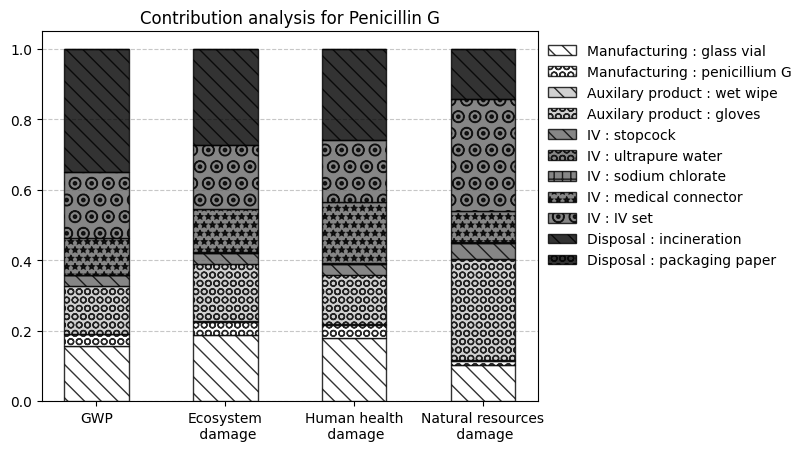

In [206]:
cmap = plt.get_cmap("Greys")
colors = [cmap(i) for i in np.linspace(0, 1, len(val_dct.keys()))]
# colors = colors[:4]
# colors

x_axis_txt = (
            "GWP",
            "Ecosystem\n damage",
            "Human health\n damage",
            "Natural resources\n damage"
)

hatct_styles = [
    "\\\\",
    "OO",
    "++",
    "**",
    "O."
]

width = 0.5

fig, ax = plt.subplots()

bottom = np.zeros(len(dct.keys()))

for idx, (cat, dct_) in enumerate(dct.items()):
    for col_idx, (key, item_dct) in enumerate(dct_.items()):
        # print(key)
        for hatch, (act, item) in enumerate(item_dct.items()):
            
            # print(act, item, bottom[idx])
            p = ax.bar(
                x_axis_txt[idx], 
                item, 
                width, 
                label=str(act), 
                bottom=bottom[idx],
                color=colors[col_idx],
                edgecolor="k", 
                hatch=hatct_styles[hatch],
                alpha=0.8,
                zorder=10
            )

            
            bottom[idx] += item
            # if f"{act}" not in leg_txt:
            #     leg_txt.append(str(leg_txt))

ax.set_title("Contribution analysis for Penicillin G")
ax.legend(
        leg_txt,
        loc='upper left',
        bbox_to_anchor=(0.995, 1),
        ncol= 1,  # Adactjust the number of columns based on legend size
        fontsize=10,
        frameon=False
    )
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=-0)

plt.show()

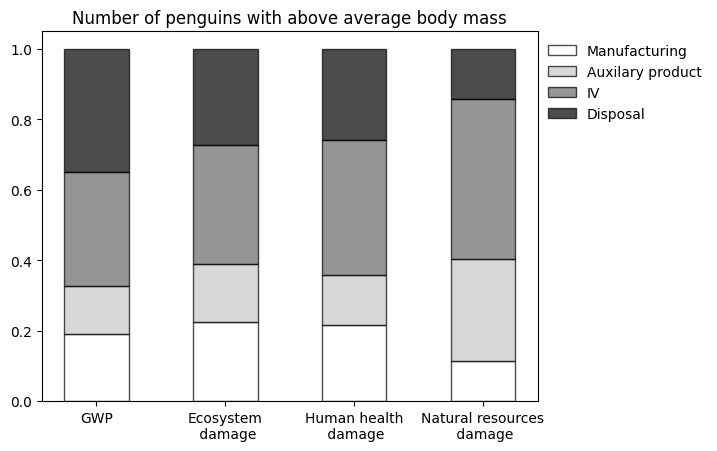

In [165]:

x_axis_txt = (
            "GWP",
            "Ecosystem\n damage",
            "Human health\n damage",
            "Natural resources\n damage"
)

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(val_dct.keys()))

for color_idx, (cat, val) in enumerate(val_dct.items()):
    p = ax.bar(
        x_axis_txt, 
        val, 
        width, 
        label=cat, 
        bottom=bottom,
        color = colors[color_idx],
        edgecolor="k", 
        alpha=0.7
        )
    bottom += val

ax.set_title("Number of penguins with above average body mass")
ax.legend(
        df.columns,
        loc='upper left',
        bbox_to_anchor=(0.995, 1),
        ncol= 1,  # Adjust the number of columns based on legend size
        fontsize=10,
        frameon=False
    )


plt.show()

In [166]:
# fu_contr = {}
# idx_contr = {}
# for key, item in fu_all.items():
#     if key == acts[1]:
#         fu_contr[key] = []
#         idx_contr[key] = []
#         val = fu_all[acts[1]]
#         for exc in acts[1].exchanges():
#             if exc["type"] == "technosphere":
#                 fu_contr[key].append({exc.input : exc["amount"]*val})
#                 idx_contr[key].append(exc.input)
#         for act in var.db:
#             if "penicillium G" in str(act):
#                 # print(act)
#                 fu_contr[key].append({act : scaling_dct["manufacturing of raw penicillium G"]})
#                 idx_contr[key].append(act)
                
#     elif key == acts[4]:
#         fu_contr[key] = []
#         idx_contr[key] = []
#         val = fu_all[acts[4]]
#         for exc in acts[4].exchanges():
#             if exc["type"] == "technosphere":
#                 fu_contr[key].append({exc.input : exc["amount"]*val})
#                 idx_contr[key].append(exc.input)

# fu_contr

In [167]:
# # Set up and perform the LCA calculation
# dct_contr = {}
# for act, func_unit in fu_contr.items():
#     calc_setup_name = str(act)
#     bd.calculation_setups[calc_setup_name] = {'inv': func_unit, 'ia': data[1]}
#     mylca = bc.MultiLCA(calc_setup_name)
#     res = mylca.results
#     temp_df = pd.DataFrame(0, index=idx_contr[act], columns=data[1], dtype=object)

#     # Store results in DataFrame
#     for col, arr in enumerate(res):
#         for row, val in enumerate(arr):
#             temp_df.iat[col, row] = val
            
#     dct_contr[act] = temp_df

In [168]:
# act_keys = list(dct_contr.keys())
# act_keys

In [169]:
# df_temp = dct_contr[act_keys[0]]

# dfuc = dc(df_temp)
# idxs = list(df_temp.index)

# for col in df_temp.columns:
#     dfuc.at[idxs[4], col] -= df_temp.at[idxs[-1], col]


In [170]:
# dct_pct_contr = {}
# keys = []
# for act, df in dct_contr.items():
#     mid, end = var.recipe_dataframe_split(df)

#     mid_copy = dc(mid)
#     for col in mid_copy.columns:
#         tot = mid_copy[col].to_numpy().sum()
#         for idx, row in mid_copy.iterrows():
#             row[col] /= tot
#             row[col] *= 100
#     # mid_copy[data[1][1]].to_frame()

#     dct_pct_contr[act] = mid_copy


In [171]:
# dct_pct_contr[act_keys[0]]

In [172]:
# penicillin_vial_prod = list(dct_pct_contr[act_keys[0]].index)[4]


In [173]:

# for exc in penicillin_vial_prod.exchanges():
#     if exc["type"] == "technosphere":
#         print(exc["name"], exc["amount"], exc["unit"])